# PROJECT:7- Big Data Mart Sales Problem

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.



In [3]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import scipy
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os

In [4]:
#loading training dataset
os.chdir("C:\GitBash\Files")
df1 = pd.read_csv("bigdatamart_Train.csv")
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Exploratory Data Analysis (EDA)

DATA ANALYSIS OF TRAINING DATASET

In [5]:
df1.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df1.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3297,FDZ43,11.0,Regular,0.057291,Fruits and Vegetables,242.7512,OUT018,2009,Medium,Tier 3,Supermarket Type2,1938.8096
2560,DRQ35,9.3,Low Fat,0.042256,Hard Drinks,124.4388,OUT013,1987,High,Tier 3,Supermarket Type1,1609.9044
3635,NCL55,NaN,Low Fat,0.113213,Others,254.6040,OUT019,1985,Small,Tier 1,Grocery Store,759.0120
8006,NCO41,12.5,Low Fat,0.018849,Health and Hygiene,96.7384,OUT046,1997,Small,Tier 1,Supermarket Type1,2167.8448
3946,DRD15,10.6,Low Fat,0.056796,Dairy,232.8642,OUT046,1997,Small,Tier 1,Supermarket Type1,3485.4630


In [7]:
df1.tail(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [8]:
df1.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

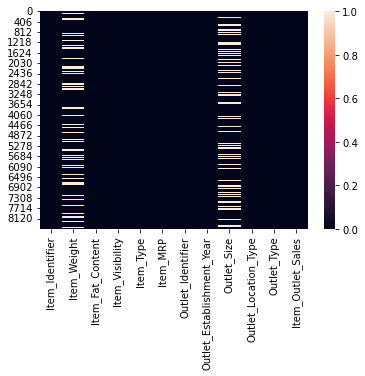

In [10]:
sns.heatmap(df1.isnull())

OBSERVATION 

We see that columns "Item Weight" and "Outlet Size" has large number of missing values.

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


OBSERVATION:

The above cell shows that our data set consists of 4 columns with float datatype, 1 column with integer datatype and 7 columns with object datatype.

# Statistical Summary


In [12]:
df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


OBSERVATION

Column Item_MRP has huge difference between 75% and max indicating some outlier 

In [13]:
# checking for the list of all unique data or rows present in the columns
df1.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [14]:
#removing the columns "Item_Identifier" and "Outlet_Identifier" since they just have the ID details and have no categorical information to offer.
obj_columns = []
for x in df1.dtypes.index:
    if df1.dtypes[x] == 'object':
        obj_columns.append(x)
        

obj_columns.remove('Item_Identifier')
obj_columns.remove('Outlet_Identifier')

obj_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [15]:
for col in obj_columns:
    print(col)
    print(df1[col].value_counts())
    print("="*40)

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


OBSERVATION

In the column "Item_Fat_Content" we can combine the types Low fat, LF, low fat into one single entity as they all represent the low fat information in the products. Similarly Regular and reg can be combined into one single entity that would display regular/fat details.

The "Item_Type" shows the types of food present.

The "Outlet_Size" has 3 categories medium size area, small size area and high/large size area. While the "Outlet_Location_Type" also has 3 categories tier 3, tier 2 and tier 1 showcasing whether it's built in a pricey location or not.

The "Outlet_Type" shows 4 categories namely Supermarket Type1, Supermarket Type2, Supermarket Type3 and Grocery Store.

# FILLING MISSING VALUES


In [16]:
item_weight_mean = df1.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [17]:
missing_data = df1['Item_Weight'].isnull()

for i, item in enumerate(df1['Item_Identifier']):
    if missing_data[i]:
        if item in item_weight_mean:
            df1['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df1['Item_Weight'][i] = np.mean(df1['Item_Weight'])

In [18]:
df1['Item_Weight'].isnull().sum()

0

OBSERVATION

We have successfully filled all the missing rows present previouly in the "Item_Weight" using mean.

In [19]:
outlet_size_mode = df1.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [20]:
missing_val = df1['Outlet_Size'].isnull()
df1.loc[missing_val, 'Outlet_Size'] = df1.loc[missing_val, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [21]:
df1['Outlet_Size'].isnull().sum()

0

OBSERVATION

We have successfully filled all the missing rows present previouly in the COLUMN ""Outlet_Size" using mode.

In [22]:
sum(df1['Item_Visibility']==0)

526

column "Item_Visibility" does not show any null valo but it has  526 data having 0 in its column ,so again this does not make good data for model building.so we will replace it using mean .

In [23]:
df1.loc[:, 'Item_Visibility'].replace([0], [df1['Item_Visibility'].mean()], inplace=True)

In [24]:
sum(df1['Item_Visibility']==0)

0

OBSERVATION

The 0 values are replaced by the mean value

In [25]:
df1['Item_Fat_Content'] = df1['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df1['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

 "Item_Fat_Content" column has similar categories so its  better to combine these data we and replace the LF and low fat option to Low Fat while the reg is change to Regular option making only 2 options than the previous 5 categories.

In [26]:
#adding more columns/categories from existing one
df1['New_Item_Type'] = df1['Item_Identifier'].apply(lambda x: x[:2])
df1['New_Item_Type'] = df1['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df1['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

 "Item_Identifier" column has prefixes such as FD, DR and NC that indicates towards the type of product that was being sold. Hence we created a new column that that had these categories tagged as Food, Drinks and Non Consumable to have column lesser options,

In [27]:
df1.loc[df1['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df1['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

With the usage of Non Consumable category for the newly created column we are adding an extra category to our exisiting column "Item_Fat_Content" which is tagged as Non Edible.

In [28]:
df1['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'Non-Edible'], dtype=object)

In [29]:
df1['Outlet_Years'] = 2013 - df1['Outlet_Establishment_Year']
df1['Outlet_Years'].head()

0    14
1     4
2    14
3    15
4    26
Name: Outlet_Years, dtype: int64

To reduce the only integer column present in our dataset to a lesser value that would not make our model biased eventually we are reducing the year of establishment after comparing it with the year of data collection that is 2013.

As we have created the new "Outlet_Years" column that contains the information of how many years it has been for the outlet being built till the year of data collection we are dropping the original "Outlet_Establishment_Year" column.

In [30]:
#dropping column
df1 = df1.drop("Outlet_Establishment_Year", axis=1)
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.930,Non-Edible,0.066132,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,Food,26
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,Small,Tier 2,Supermarket Type1,549.2850,Food,11
8520,NCJ29,10.600,Non-Edible,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,Non-Consumable,9
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,Food,4


In [31]:
df1.skew()

Item_Weight          0.090561
Item_Visibility      1.286877
Item_MRP             0.127202
Item_Outlet_Sales    1.177531
Outlet_Years         0.396641
dtype: float64

OBSERVATION

Item_Outlet_Sales and Item_Visibility has skewness more than threshold value +/-0.5

# DROPPING COLUMNS

In [32]:
df1 = df1.drop(["Item_Identifier","Outlet_Identifier"], axis=1)

Removing the columns Item_Identifier and Outlet_Identifier as they are just providing the ID information and it doesnt contribute anything to the machine learning.

# DATA VISUALIZATION

# PAIRPLOT

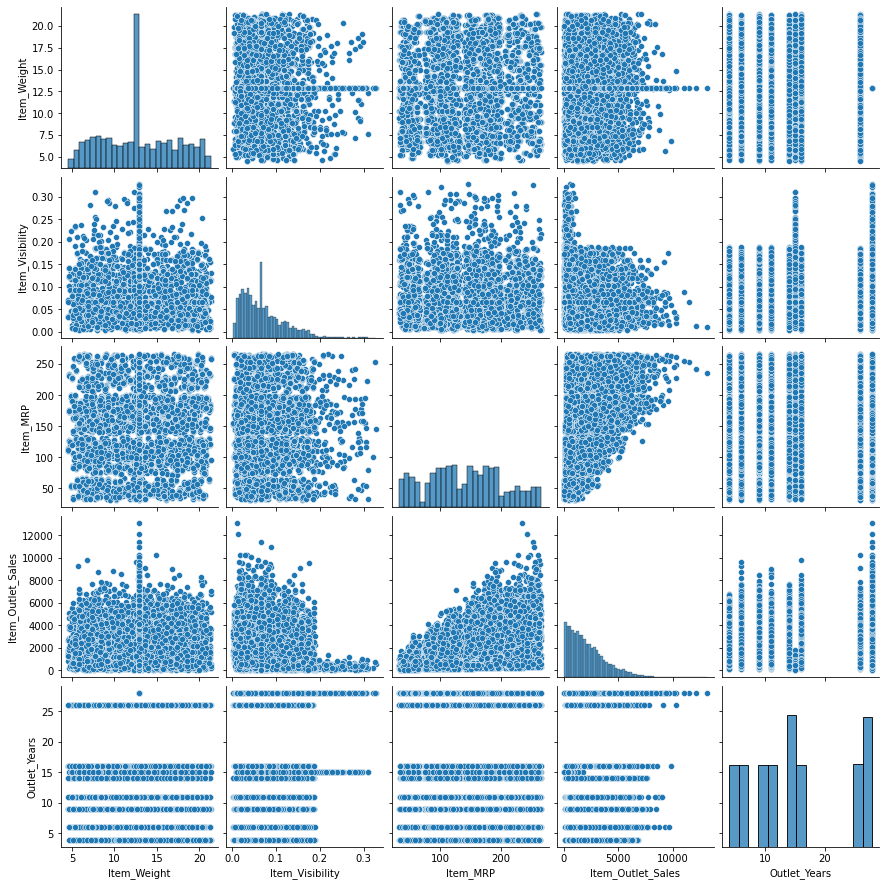

In [33]:
sns.pairplot(df1)

OBSERVATION
From the scatterplots we see lots of data point convergence towards the centre due to the replacement of values using the mean option.

# COUNTPLOT

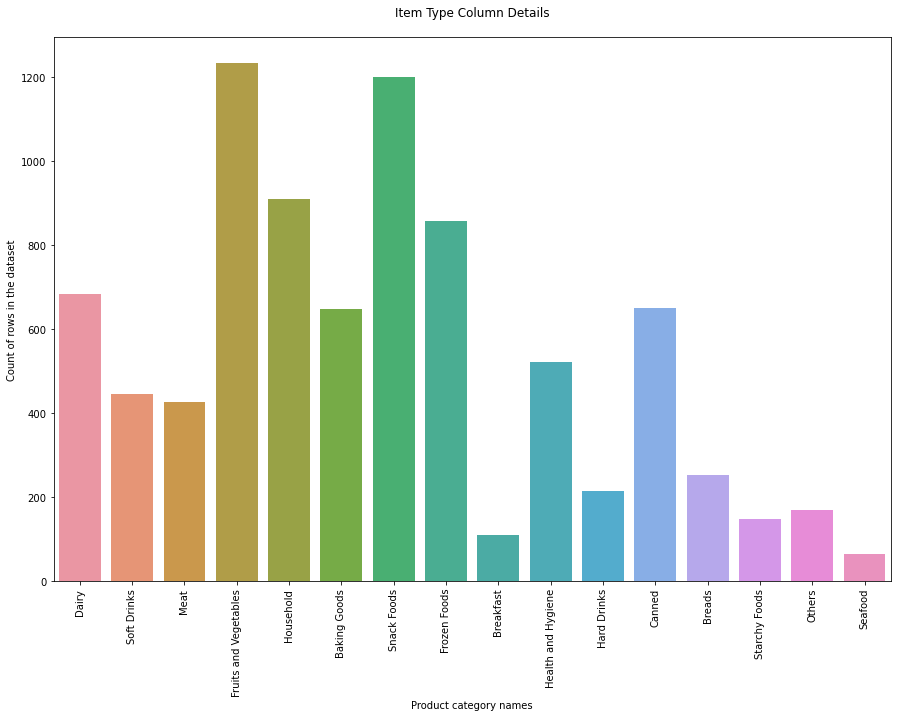

In [34]:
plt.figure(figsize=(15,10))
values = list(df1['Item_Type'].unique())
diag = sns.countplot(df1["Item_Type"])
diag.set_xticklabels(labels=values, rotation=90)
plt.title("Item Type Column Details\n")
plt.xlabel("Product category names")
plt.ylabel("Count of rows in the dataset")
plt.show()

OBSERVATION

In the above count plot we see all the categorical product names present in the Item_Type column and it's value counts present in the dataset given us an insight on how Fruits/Vegetables and Snack foods are the highest number of product present in the outlet since they get sold at a larger numbeR

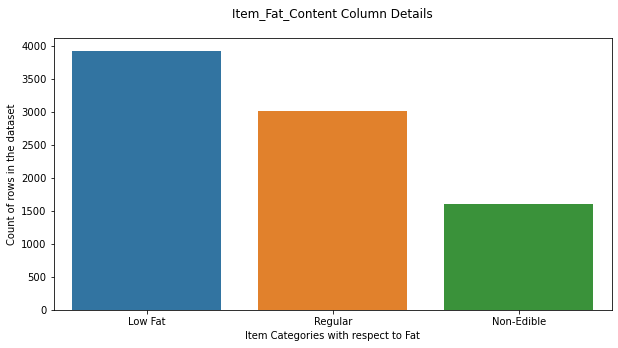

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(df1["Item_Fat_Content"])
plt.ylabel("Count of rows in the dataset")
plt.xlabel("Item Categories with respect to Fat")
plt.title("Item_Fat_Content Column Details\n")
plt.show()

OBSERVATION

The fat content details present in the products are being depicted using the visual representation wherein the numbers of low fat is higher than the regular product and non edible items will obviously have nothing to do with it's fat content so it is on a lower scale.

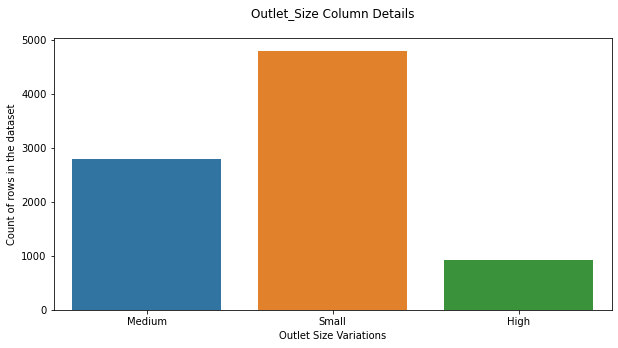

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(df1["Outlet_Size"])
plt.ylabel("Count of rows in the dataset")
plt.xlabel("Outlet Size Variations")
plt.title("Outlet_Size Column Details\n")
plt.show()

OBSERVATION

The above count plot gives us a visual representation on the Outlet Size data where small size outlets are higher when compared to the others and large size outlets are very less in number

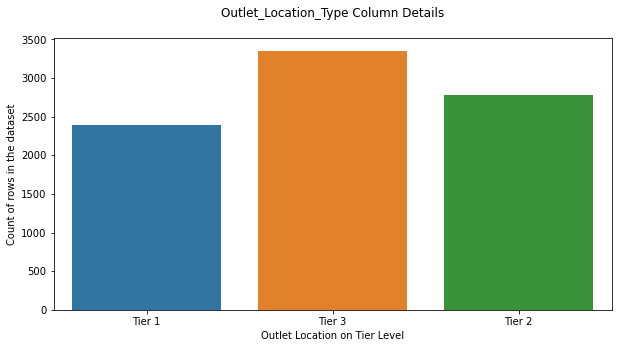

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(df1["Outlet_Location_Type"])
plt.ylabel("Count of rows in the dataset")
plt.xlabel("Outlet Location on Tier Level")
plt.title("Outlet_Location_Type Column Details\n")
plt.show()

OBSERVATION

The count plot for Outlet Location shows us the different tier types and looks like Tier 3 has the highest value then comes Tier 2 and finally Tier 1 being the most expensive style to be built upon depending upon the location, area size and expense to make it.

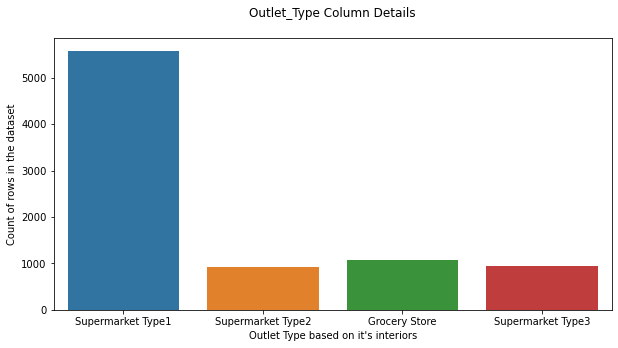

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(df1["Outlet_Type"])
plt.ylabel("Count of rows in the dataset")
plt.xlabel("Outlet Type based on it's interiors")
plt.title("Outlet_Type Column Details\n")
plt.show()

OBSERVATION

The count plot for Outlet Type reveals the different category of outlet ranging from Supermarket Type1, Supermarket Type2, Supermarket Type3 and Grocery Store. The plot shows that Supermarket Type1 is the highest and possibly the most used architecture type for Big Data Mart retail store.

# CORRELATION

In [39]:
df1.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.000000,-0.017450,0.024756,0.011550,0.008301
Item_Visibility,-0.017450,1.000000,-0.005259,-0.134138,0.078355
Item_MRP,0.024756,-0.005259,1.000000,0.567574,-0.005020
Item_Outlet_Sales,0.011550,-0.134138,0.567574,1.000000,0.049135
Outlet_Years,0.008301,0.078355,-0.005020,0.049135,1.000000


<AxesSubplot:>

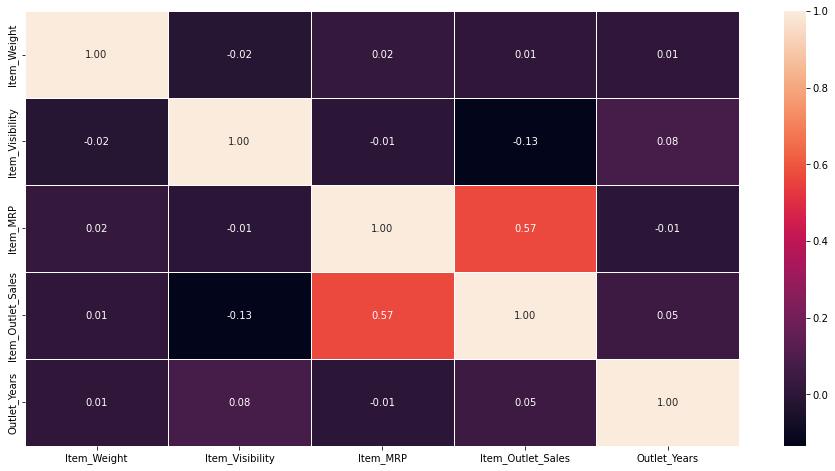

In [40]:
plt.figure(figsize=(16,8))
sns.heatmap(df1.corr(), annot=True, linewidths=0.5, fmt='.2f')

In [41]:
df1.corr().Item_Outlet_Sales.sort_values()

Item_Visibility     -0.134138
Item_Weight          0.011550
Outlet_Years         0.049135
Item_MRP             0.567574
Item_Outlet_Sales    1.000000
Name: Item_Outlet_Sales, dtype: float64

OBSERVATION

With the help of a correlation heatmap we can see that the "Sales" column has a high relation with "Item_MRP"  because the price of a product has always high effect on the sale inside a retail store.

# OUTLIERS

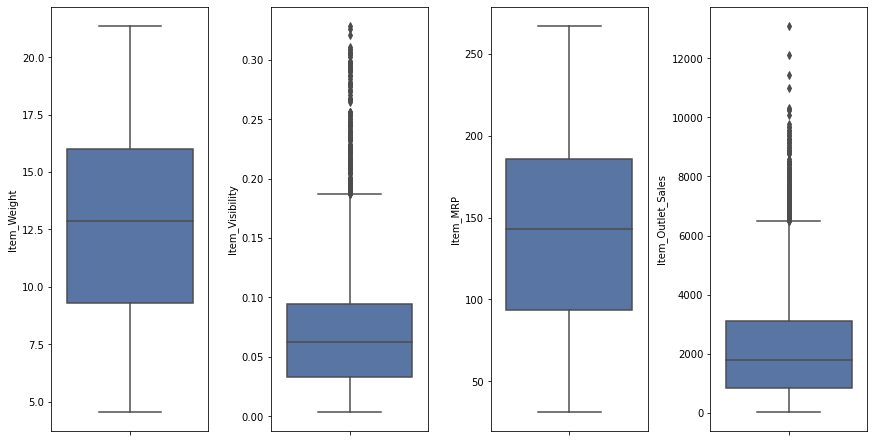

In [42]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(12,6))
index = 0
ax = ax.flatten()
numeric_column_names = ["Item_Weight", "Item_Visibility", "Item_MRP", "Item_Outlet_Sales"]
for col, value in df1[numeric_column_names].items():
    sns.boxplot(y=col, data=df1, ax=ax[index], palette="deep")
    index += 1
plt.tight_layout(pad=0.2, w_pad=0.9, h_pad=5.0)
plt.show()

OBSERVATION

The box plot shows us that there are outliers present in  columns "Item_Visibility" and "Item_Outlet_Sales" but these outliers look like continous data points  our model should not face any issue due to it.

# SKEWNESS

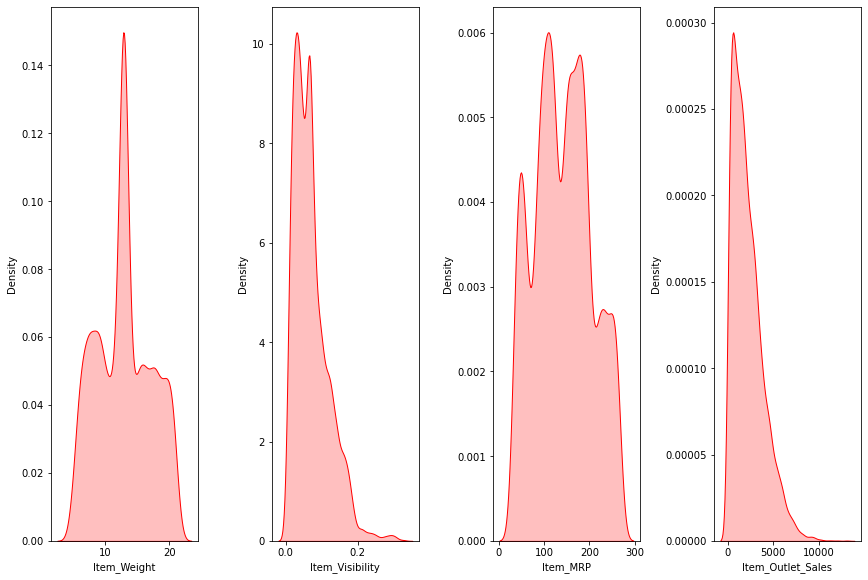

In [43]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(12,8))
index = 0
ax = ax.flatten()
numeric_column_names = ["Item_Weight", "Item_Visibility", "Item_MRP", "Item_Outlet_Sales"]
for col, value in df1[numeric_column_names].items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

OBSERVATION

distribution plot created for the numeric data columns show the normal distribution format for all of them. The right skewness present in "Item_Visibility" is due to the continous outlier we saw in the above Boxplot.


# DATA PREPROCESSING


TRANSFORMATION

In [44]:
# log transformation on "Item_Outlet_Sales" column

df1['Item_Outlet_Sales'] = np.log(1+df1['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

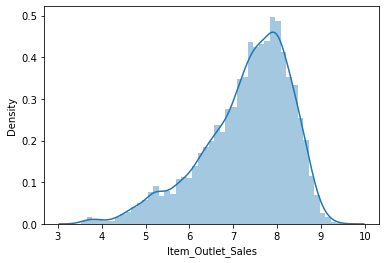

In [45]:
sns.distplot(df1['Item_Outlet_Sales'])

ENCODING

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [47]:
df1['Item_Type']=le.fit_transform(df1['Item_Type'])

In [48]:
df1['Item_Type'].unique()

array([ 4, 14, 10,  6,  9,  0, 13,  5,  2,  8,  7,  3,  1, 15, 11, 12])

We are using label encoding only on "Item_Type" as it had lots of categories and if we use one hot encoding on it then the number of columns will increase a lot

In [49]:
df1 = pd.get_dummies(df1, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
df1

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Size_High,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,9.300,0.016047,4,249.8092,8.225808,14,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.920,0.019278,14,48.2692,6.096776,4,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,17.500,0.016760,10,141.6180,7.648868,14,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.200,0.066132,6,182.0950,6.597664,15,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,8.930,0.066132,9,53.8614,6.903451,26,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,13,214.5218,7.929984,26,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
8519,8.380,0.046982,0,108.1570,6.310436,11,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
8520,10.600,0.035186,8,85.1224,7.085159,9,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
8521,7.210,0.145221,13,103.1332,7.521100,4,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


# SPLITTING DATASET INTO FEATURES AND TARGET

In [50]:
x = df1.drop('Item_Outlet_Sales', axis=1)
y = df1['Item_Outlet_Sales']

In [51]:
x

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,9.300,0.016047,4,249.8092,14,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
1,5.920,0.019278,14,48.2692,4,0,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0
2,17.500,0.016760,10,141.6180,14,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
3,19.200,0.066132,6,182.0950,15,0,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
4,8.930,0.066132,9,53.8614,26,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,13,214.5218,26,1,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
8519,8.380,0.046982,0,108.1570,11,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
8520,10.600,0.035186,8,85.1224,9,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
8521,7.210,0.145221,13,103.1332,4,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0


In [52]:
y

0       8.225808
1       6.096776
2       7.648868
3       6.597664
4       6.903451
          ...   
8518    7.929984
8519    6.310436
8520    7.085159
8521    7.521100
8522    6.642056
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

# FEATURE SCALING

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,-0.841872,-1.111358,-0.766479,1.747454,-0.139541,1.084133,-0.480558,-0.738147,-0.350395,1.432326,...,1.602840,-0.696678,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
1,-1.641706,-1.045067,1.608963,-1.489023,-1.334103,-0.922396,-0.480558,1.354743,-0.350395,1.432326,...,-0.623893,-0.696678,1.242650,-0.381529,-1.375891,2.860816,-0.351028,3.109193,-1.598190,-0.480558
2,1.098554,-1.096733,0.658786,0.010040,-0.139541,1.084133,-0.480558,-0.738147,-0.350395,1.432326,...,1.602840,-0.696678,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
3,1.500838,-0.083740,-0.291391,0.660050,-0.020085,-0.922396,-0.480558,1.354743,-0.350395,-0.698165,...,-0.623893,-0.696678,1.242650,2.621031,-1.375891,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
4,-0.929428,-0.083740,0.421242,-1.399220,1.293934,-0.922396,2.080915,-0.738147,2.853918,-0.698165,...,-0.623893,-0.696678,1.242650,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,-1.598190,2.080915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.418084,-0.275551,1.371418,1.180783,1.293934,1.084133,-0.480558,-0.738147,2.853918,-0.698165,...,-0.623893,-0.696678,1.242650,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
8519,-1.059578,-0.476643,-1.716656,-0.527301,-0.497909,-0.922396,-0.480558,1.354743,-0.350395,-0.698165,...,-0.623893,1.435383,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
8520,-0.534243,-0.718672,0.183698,-0.897208,-0.736822,-0.922396,2.080915,-0.738147,-0.350395,-0.698165,...,-0.623893,1.435383,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,-1.598190,2.080915
8521,-1.336444,1.538968,1.371418,-0.607977,-1.334103,-0.922396,-0.480558,1.354743,-0.350395,1.432326,...,-0.623893,-0.696678,1.242650,-0.381529,-1.375891,2.860816,-0.351028,-0.321627,0.625708,-0.480558


OBSERVATION

Our model isready for Machine Learning

# MACHINE LEARNING

Since the y (Target) has continuous values we will use Linear Regression model

Finding Best Random State

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
lr = LinearRegression()

In [56]:
for i in range(1,150):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is :  {r2_score(y_test,pred_test)}")
    print("\n")

At random state 1, the training accuracy is : 0.7181057867158107
At random state 1, the testing accuracy is :  0.7264907700896144


At random state 2, the training accuracy is : 0.7222902336974719
At random state 2, the testing accuracy is :  0.710837570115077


At random state 3, the training accuracy is : 0.7108683462338463
At random state 3, the testing accuracy is :  0.7532038649802484


At random state 4, the training accuracy is : 0.7187180536519386
At random state 4, the testing accuracy is :  0.7253157933694054


At random state 5, the training accuracy is : 0.7224642016222609
At random state 5, the testing accuracy is :  0.7103678082553844


At random state 6, the training accuracy is : 0.7236098278065801
At random state 6, the testing accuracy is :  0.7057934357638371


At random state 7, the training accuracy is : 0.7229269531907755
At random state 7, the testing accuracy is :  0.7088639217951844


At random state 8, the training accuracy is : 0.7162665508190464
At random st

Hence we chose random state 97 since both training and testing accuracy is close by and higher in value 

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=97)

In [58]:
lr.fit(x_train,y_train)

LinearRegression()

In [59]:
pred_test = lr.predict(x_test)

In [60]:
print(r2_score(y_test,pred_test))

0.7190951710520885


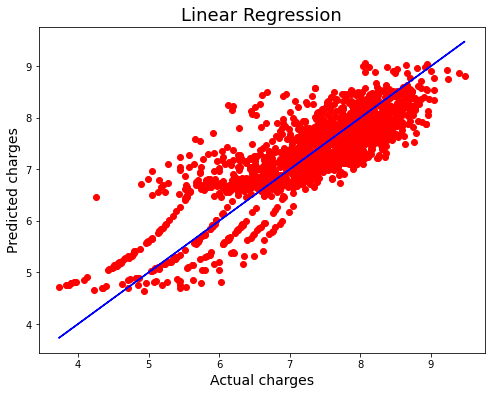

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual charges', fontsize=14)
plt.ylabel('Predicted charges', fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [63]:
# creating a function to run all the regressors

def regressor(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=97)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Root Mean Square Error (RMSE)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("Root Mean Square Error is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score is:", cv_score)
    
    # Result of r2 score - cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

Linear Regression

In [64]:
model=LinearRegression()
regressor(model, x, y)

Root Mean Square Error is: 0.5363507765252244
R2 Score is: 71.90951710520885
Cross Validation Score is: 71.87136998719706
R2 Score - Cross Validation Score is 0.03814711801179271


L1 -- Lasso Regression

In [65]:
model=Lasso(alpha=0.0001)
regressor(model, x, y)

Root Mean Square Error is: 0.5363727042880203
R2 Score is: 71.90722019779696
Cross Validation Score is: 71.87078094515246
R2 Score - Cross Validation Score is 0.036439252644498765


L2 -- Ridge Regression

In [66]:
model=Ridge(alpha=0.0001)
regressor(model, x, y)

Root Mean Square Error is: 0.5363768940162068
R2 Score is: 71.90678131800263
Cross Validation Score is: 71.87113536710406
R2 Score - Cross Validation Score is 0.03564595089856937


Elastic Net

In [67]:
model=ElasticNet(alpha=0.0001)
regressor(model, x, y)

Root Mean Square Error is: 0.5363708133482427
R2 Score is: 71.90741827521862
Cross Validation Score is: 71.8711193561046
R2 Score - Cross Validation Score is 0.03629891911401728


Support Vector Regression

In [68]:
model=SVR(kernel='rbf')
regressor(model, x, y)

Root Mean Square Error is: 0.5321040792342756
R2 Score is: 72.3525835494675
Cross Validation Score is: 72.33694966484373
R2 Score - Cross Validation Score is 0.015633884623767358


In [69]:
model=SVR(kernel='poly')
regressor(model, x, y)

Root Mean Square Error is: 0.5531908677289484
R2 Score is: 70.11788163735848
Cross Validation Score is: 70.53986110800577
R2 Score - Cross Validation Score is -0.4219794706472868


In [70]:
model=SVR(kernel='linear')
regressor(model, x, y)

Root Mean Square Error is: 0.5424967979925749
R2 Score is: 71.26205323336795
Cross Validation Score is: 71.43303766417883
R2 Score - Cross Validation Score is -0.17098443081087566


Decision Tree

In [71]:
model=DecisionTreeRegressor(random_state=97)
regressor(model, x, y)

Root Mean Square Error is: 0.7655183473984797
R2 Score is: 42.77674134257491
Cross Validation Score is: 44.29333923187918
R2 Score - Cross Validation Score is -1.516597889304272


Random Forest

In [72]:
model=RandomForestRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.554564672723062
R2 Score is: 69.9692776716729
Cross Validation Score is: 69.81115751351014
R2 Score - Cross Validation Score is 0.1581201581627596


K Neighbors 

In [73]:
model=KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
regressor(model, x, y)

Root Mean Square Error is: 0.6537722546576333
R2 Score is: 58.263661217496136
Cross Validation Score is: 58.18402883704099
R2 Score - Cross Validation Score is 0.07963238045514487


SGD 

In [74]:
model=SGDRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.538961484200625
R2 Score is: 71.63538858526202
Cross Validation Score is: 71.69887313745382
R2 Score - Cross Validation Score is -0.06348455219179527


Gradient Boosting Regressor

In [75]:
model=GradientBoostingRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.5208949942199315
R2 Score is: 73.50513289837777
Cross Validation Score is: 73.51012762214606
R2 Score - Cross Validation Score is -0.004994723768291465


Ada Boost Regressor

In [76]:
model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=97)
regressor(model, x, y)

Root Mean Square Error is: 0.5802312866362297
R2 Score is: 67.12515885126653
Cross Validation Score is: 67.24659211597374
R2 Score - Cross Validation Score is -0.12143326470720694


Extra Trees Regressor

In [77]:
model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
regressor(model, x, y)

Root Mean Square Error is: 0.563331183863101
R2 Score is: 69.01232708477762
Cross Validation Score is: 68.95647200723903
R2 Score - Cross Validation Score is 0.05585507753859531


OBSERVATION

Comparing all the above the Gradient Boosting Regressor gives the best results since the R2 Score - Cross Validation Score are closest and the highest amoung all the models

# HYPER PARAMETER TUNING

HYPER PARAMETER TUNING USING GCV

In [78]:
# creating parameters list to pass into GridSearchCV

parameters = {'loss' : ['squared_error', 'absolute_error', 'quantile'],
              'learning_rate': [0.1, 1.05],
              'criterion': ['friedman_mse', 'squared_error', 'mse'],
              'max_depth' : [3 , 4 ],
              'max_features' : ['auto', 'sqrt', 'log2']}

In [79]:
GCV = GridSearchCV(GradientBoostingRegressor(), parameters, cv=5)

In [80]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.1, 1.05],
                         'loss': ['squared_error', 'absolute_error',
                                  'quantile'],
                         'max_depth': [3, 4],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [81]:
GCV.best_params_

{'criterion': 'mse',
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': 'sqrt'}

OBSERVATION

We  have got the best parameters using Gridsearch CV

In [92]:
#final model
final_model = GradientBoostingRegressor(criterion= 'mse', learning_rate=0.1 , loss= 'squared_error', max_depth =3 , max_features = 'sqrt')

In [93]:
#final fit
final_fit = final_model.fit(x_train,y_train)

In [94]:
#final prediction
final_pred = final_model.predict(x_test)

In [95]:
best_r2=r2_score(y_test,final_pred,multioutput='variance_weighted')*100   # checking final r2_score
print("R2 score for the Best Model is:", best_r2)

R2 score for the Best Model is: 73.46308791750774


OBSERVATION

Using Hyper Parameter Tuning on the final model,we obtained the best r2_score.

# Pre processing the Testing Dataset to predict the Sales column

In [97]:
#loading testing dataset
os.chdir("C:\GitBash\Files")
test = pd.read_csv("bigdatamart_Test.csv")
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [99]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [98]:
# filling missing data in the testing dataset for column "Item_Weight"

item_weight_mean = test.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
missing_data = test['Item_Weight'].isnull()
for i, item in enumerate(test['Item_Identifier']):
    if missing_data[i]:
        if item in item_weight_mean:
            test['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            test['Item_Weight'][i] = np.mean(test['Item_Weight'])

In [100]:
# filling missing data in the testing dataset for column "Outlet_Size"

outlet_size_mode = test.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
missing_val = test['Outlet_Size'].isnull()
test.loc[missing_val, 'Outlet_Size'] = test.loc[missing_val, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [102]:
# filling zero values in the testing dataset for column "Item_Visibility"

test.loc[:, 'Item_Visibility'].replace([0], [test['Item_Visibility'].mean()], inplace=True)

In [104]:
#combining similar daa rows
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [105]:
# Creating a new column named "New_Item_Type" and adding proper categories using map

test['New_Item_Type'] = test['Item_Identifier'].apply(lambda x: x[:2])
test['New_Item_Type'] = test['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
test['New_Item_Type'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: New_Item_Type, dtype: int64

In [108]:
# Creating a new column named "Item_Fat_Content" and adding proper categories

test.loc[test['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
test['Item_Fat_Content'].value_counts()

Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

In [109]:
# Creating a new column named "Outlet_Years" and removing the column "Outlet_Establishment_Year" 

test['Outlet_Years'] = 2013 - test['Outlet_Establishment_Year']
test= test.drop("Outlet_Establishment_Year", axis=1)

In [110]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,Food,14
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,Small,Tier 2,Supermarket Type1,Food,6
2,NCN55,14.600000,Non-Edible,0.099575,Others,241.7538,OUT010,Small,Tier 3,Grocery Store,Non-Consumable,15
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,Small,Tier 2,Supermarket Type1,Food,6
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,Food,28
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,Small,Tier 1,Supermarket Type1,Food,16
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,Medium,Tier 3,Supermarket Type2,Food,4
5678,NCO17,10.000000,Non-Edible,0.073529,Health and Hygiene,118.7440,OUT045,Small,Tier 2,Supermarket Type1,Non-Consumable,11
5679,FDJ26,15.300000,Regular,0.065684,Canned,214.6218,OUT017,Small,Tier 2,Supermarket Type1,Food,6


In [111]:
#dropping the ID columns "Item_Identifier" and "Outlet_Identifier"

test = test.drop(["Item_Identifier","Outlet_Identifier"], axis=1)

LABEL ENCODER

In [112]:
label_encoder = LabelEncoder()
col_name = ["Item_Type"]
for col in col_name:
    test[col] = label_encoder.fit_transform(test[col])

In [113]:
test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years
0,20.750000,Low Fat,0.007565,13,107.8622,Medium,Tier 1,Supermarket Type1,Food,14
1,8.300000,Regular,0.038428,4,87.3198,Small,Tier 2,Supermarket Type1,Food,6
2,14.600000,Non-Edible,0.099575,11,241.7538,Small,Tier 3,Grocery Store,Non-Consumable,15
3,7.315000,Low Fat,0.015388,13,155.0340,Small,Tier 2,Supermarket Type1,Food,6
4,12.695633,Regular,0.118599,4,234.2300,Medium,Tier 3,Supermarket Type3,Food,28
...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,Regular,0.013496,13,141.3154,Small,Tier 1,Supermarket Type1,Food,16
5677,7.600000,Regular,0.142991,15,169.1448,Medium,Tier 3,Supermarket Type2,Food,4
5678,10.000000,Non-Edible,0.073529,8,118.7440,Small,Tier 2,Supermarket Type1,Non-Consumable,11
5679,15.300000,Regular,0.065684,3,214.6218,Small,Tier 2,Supermarket Type1,Food,6


In [114]:
#using one hot encoder
test = pd.get_dummies(test, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])


In [115]:
test

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,20.750000,0.007565,13,107.8622,14,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
1,8.300000,0.038428,4,87.3198,6,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2,14.600000,0.099575,11,241.7538,15,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3,7.315000,0.015388,13,155.0340,6,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,12.695633,0.118599,4,234.2300,28,0,0,1,0,1,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,0.013496,13,141.3154,16,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
5677,7.600000,0.142991,15,169.1448,4,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
5678,10.000000,0.073529,8,118.7440,11,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
5679,15.300000,0.065684,3,214.6218,6,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0


FEATURE SCALING

In [116]:
scaler = StandardScaler()
test = pd.DataFrame(scaler.fit_transform(test), columns=test.columns)


In [117]:
test

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,1.897460e+00,-1.285395,1.366916,-0.536555,-0.139891,1.095940,-0.486429,-0.740811,-0.350325,1.432138,...,1.602644,-0.696584,-0.804750,-0.381568,0.726900,-0.349374,-0.351274,-0.316748,0.627510,-0.486429
1,-1.035530e+00,-0.647603,-0.766450,-0.868937,-1.095512,-0.912459,-0.486429,1.349873,-0.350325,-0.698257,...,-0.623969,1.435578,-0.804750,-0.381568,0.726900,-0.349374,-0.351274,-0.316748,0.627510,-0.486429
2,4.486336e-01,0.616028,0.892835,1.629848,-0.020438,-0.912459,2.055799,-0.740811,-0.350325,-0.698257,...,-0.623969,-0.696584,1.242623,2.620767,-1.375706,-0.349374,-0.351274,-0.316748,-1.593601,2.055799
3,-1.267578e+00,-1.123718,1.366916,0.226697,-1.095512,1.095940,-0.486429,-0.740811,-0.350325,-0.698257,...,-0.623969,1.435578,-0.804750,-0.381568,0.726900,-0.349374,-0.351274,-0.316748,0.627510,-0.486429
4,-5.105417e-14,1.009174,-0.766450,1.508110,1.532446,-0.912459,-0.486429,1.349873,-0.350325,1.432138,...,-0.623969,-0.696584,1.242623,-0.381568,-1.375706,-0.349374,2.846782,-0.316748,0.627510,-0.486429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,-5.172506e-01,-1.162816,1.366916,0.004727,0.099015,-0.912459,-0.486429,1.349873,-0.350325,-0.698257,...,1.602644,-0.696584,-0.804750,-0.381568,0.726900,-0.349374,-0.351274,-0.316748,0.627510,-0.486429
5677,-1.200437e+00,1.513236,1.840998,0.455014,-1.334417,-0.912459,-0.486429,1.349873,-0.350325,1.432138,...,-0.623969,-0.696584,1.242623,-0.381568,-1.375706,2.862264,-0.351274,-0.316748,0.627510,-0.486429
5678,-6.350414e-01,0.077770,0.181713,-0.360485,-0.498248,-0.912459,2.055799,-0.740811,-0.350325,-0.698257,...,-0.623969,1.435578,-0.804750,-0.381568,0.726900,-0.349374,-0.351274,-0.316748,-1.593601,2.055799
5679,6.135406e-01,-0.084344,-1.003490,1.190844,-1.095512,-0.912459,-0.486429,1.349873,-0.350325,-0.698257,...,-0.623969,1.435578,-0.804750,-0.381568,0.726900,-0.349374,-0.351274,-0.316748,0.627510,-0.486429


OBSERVATION

Applying Standard Scaler method on all the feature columns present in the testing data to ensure we are able to predict perfect target variable

# PREDICTING TARGET

In [118]:
# Predicting the Item_Outlet_Sales from the feature columns of our Testing dataset

Predicted_Sales = final_model.predict(test)

# Reversing the Log Transformation that was performed on the Target column while training the ML Model

Predicted_Sales = np.exp(Predicted_Sales)
Predicted_Sales

array([1331.72118197, 1266.18559753,  489.96577925, ..., 1700.56046604,
       3181.26192275, 1202.10723921])

# CONVERTING OUR OUTPUT INTO CSV FORMAT

In [119]:
predicted_output = pd.DataFrame()
predicted_output['Item_Outlet_Sales']=Predicted_Sales
predicted_output

,Item_Outlet_Sales
0,1331.721182
1,1266.185598
2,489.965779
3,2296.971225
4,5506.400831
...,...
5676,1793.266463
5677,2006.811337
5678,1700.560466
5679,3181.261923


OBSERVATION

BEST MODEL FOR TRAINING DATASET PREDICTION IS FOUND TO BE GRADIENTBOOSTING REGRESSOR.

TARGET COLUMN FOR TESTING DATASET HAVE BEEN SUCCESSFULLY ACHIEVED 